## `hcanald.py`

El número de caso seleccionado es: 3
Longitud de la respuesta impulsional: 26460
Primeros 10 valores de h: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


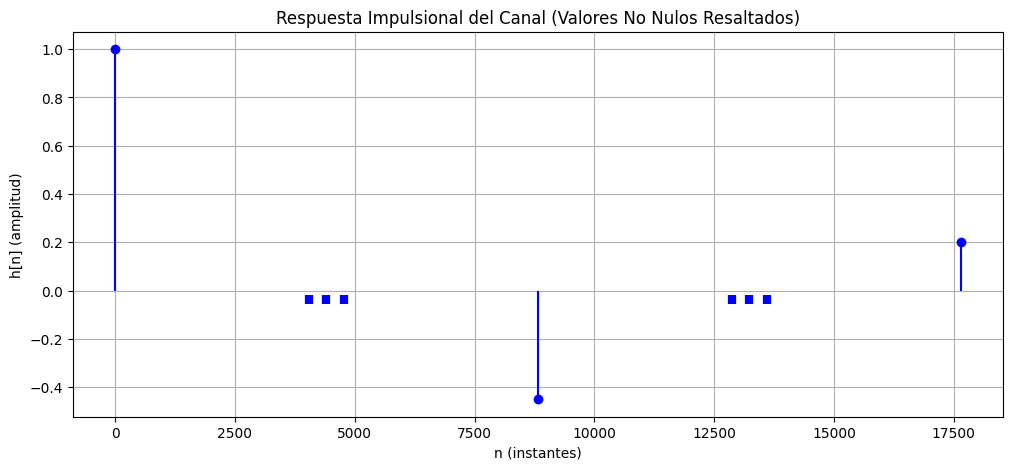

In [88]:
import numpy as np
import os
import matplotlib.pyplot as plt

def load_hcanal(num_al, base_path="data/signals"):
    """
    Selecciona y carga la respuesta impulsional del canal discreto desde el archivo CSV.

    Parámetros:
        num_al (int): Número de alumno.
        base_path (str): Ruta base donde se encuentran los archivos CSV.

    Retorna:
        n (numpy.ndarray): Instantes n correspondientes a la respuesta impulsional.
        h (numpy.ndarray): Respuesta impulsional del canal.
    """
    # Determinar el número de caso (num_al % 5)
    case_number = num_al % 5
    print(f"El número de caso seleccionado es: {case_number}")

    # Construir la ruta del archivo CSV
    file_name = f"case{case_number}_clean.csv"
    file_path = os.path.join(base_path, file_name)

    # Verificar si el archivo existe
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"El archivo {file_path} no existe. Verifique la ruta.")

    # Generar los instantes n (valores reales)
    h = np.loadtxt(file_path, delimiter=",")
    n = np.arange(len(h))  # Índices reales de n en base a la longitud de h

    return n, h

def plot_sparse_signal(n, h):
    """
    Grafica una señal mostrando solo los valores no nulos y usando puntos suspensivos.

    Parámetros:
        n (numpy.ndarray): Instantes de tiempo (valores reales del CSV).
        h (numpy.ndarray): Respuesta impulsional (amplitud de la señal).
    """
    # Encontrar los índices donde h es no nulo
    non_zero_indices = np.nonzero(h)[0]
    
    plt.figure(figsize=(12, 5))
    
    # Inicializar el gráfico
    last_index = -1  # Para manejar el primer tramo de ceros
    for idx in non_zero_indices:
        # Dibujar un tramo de ceros con puntos suspensivos si hay una separación grande
        if last_index != -1 and (n[idx] > n[last_index] + 1):
            mid_point = (n[last_index] + n[idx]) / 2
            plt.text(mid_point, 0, '...', ha='center', va='center', fontsize=34, fontweight='bold', color='blue')

        # Dibujar el valor no nulo
        plt.stem([n[idx]], [h[idx]], linefmt="b-", markerfmt="bo", basefmt=" ")

        # Actualizar el último índice no nulo
        last_index = idx

    # Configuración del gráfico
    plt.title("Respuesta Impulsional del Canal (Valores No Nulos Resaltados)")
    plt.xlabel("n (instantes)")
    plt.ylabel("h[n] (amplitud)")
    plt.grid()
    plt.show()

# Número de alumno de entrada
num_al = 14253

# Seleccionar y cargar la respuesta impulsional
n, h = load_hcanal(num_al)
 
# Mostrar información básica
print(f"Longitud de la respuesta impulsional: {len(h)}")
print(f"Primeros 10 valores de h: {h[:10]}")

# Graficar solo los valores no nulos
plot_sparse_signal(n, h)


La funcion `hcanald` devuelve una respuesta impulsional $ h[n] $ que modela un canal digital de **dos ecos**.

Un **canal digital de dos ecos** es un sistema que introduce **dos versiones retardadas y atenuadas** de la senal original. Estas versiones retardadas y atenuadas se denominan **ecos**.

El modelo matematico de un canal de dos ecos se puede modelar mediante una **convolucion** entre una senal de entrada $ x[n] $ y la **respuesta impulsional** del canal $ h[n] $.

$$
y[n] = x[n] * h[n]
$$

Donde $ h[n] $, la respuesta impulsional, tiene la siguiente forma:

$$
h[n] = \delta[n] + a_1 \delta[n - d_1] + a_2 \delta[n - d_2]
$$

- $ a_1 $: Atenuación del primer eco.
- $ d_1 $: Retardo del primer eco.
- $ a_2 $: Atenuación del segundo eco.
- $ d_2 $: Retardo del segundo eco.

El primer termino representa la senal original, que pasa **sin retraso ni atenuacion**.

El segundo y tercer termino representan el primer y segundo eco, respectivamente. Con su atenuacion $ a $ y restardo o delay $ d $

Un canal digital de dos ecos es estable en el sentido BIBO, ya que su respuesta impulsional es finita y absolutamente sumable. Un sistema FIR siempre es estable porque su respuesta impulsional es finita y no incluye retroalimentación (depende solo de los valores actuales y pasados de la entrada).

Entonces, para modelar un sistema con el comportamiento de la respuesta impulsional dada, se requieren los valores de atenuacion y retardo de cada uno de los ecos.

El siguiente script lee el archivo CSV con la respuesta impulsional $ h[n] $, identifica los valores no nulos y obtiene las amplitudes y los retardos de cada uno de los ecos.

El número de caso seleccionado es: 3
Valores obtenidos de la respuesta impulsional:
   Amplitud a1: -0.45, Retardo d1: 8820
   Amplitud a2: 0.2025, Retardo d2: 17640


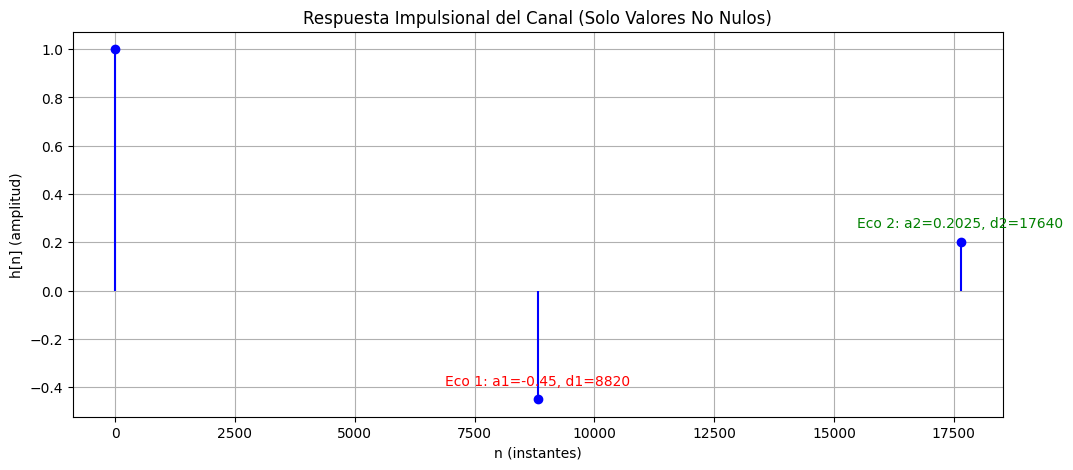

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import os

def load_hcanal(num_al, base_path="data/signals"):
    """
    Carga la respuesta impulsional del canal desde un archivo CSV.

    Parámetros:
        num_al (int): Número de alumno.
        base_path (str): Directorio base donde están los archivos CSV.

    Retorna:
        n (numpy.ndarray): Instantes de tiempo.
        h (numpy.ndarray): Respuesta impulsional del canal.
    """
    # Determinar el número de caso (num_al % 5)
    case_number = num_al % 5
    print(f"El número de caso seleccionado es: {case_number}")

    # Ruta del archivo
    file_name = f"case{case_number}_clean.csv"
    file_path = os.path.join(base_path, file_name)

    # Verificar si el archivo existe
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"El archivo {file_path} no existe.")

    # Cargar la señal desde el archivo
    h = np.loadtxt(file_path, delimiter=",")
    n = np.arange(len(h))

    return n, h

def analyze_impulse_response(n, h):
    """
    Analiza la respuesta impulsional y obtiene las amplitudes y retardos de los ecos.

    Parámetros:
        n (numpy.ndarray): Instantes de tiempo.
        h (numpy.ndarray): Respuesta impulsional del canal.

    Retorna:
        (a1, d1, a2, d2): Amplitudes y retardos de los dos ecos.
    """
    # Encontrar los índices donde h[n] es no nulo
    non_zero_indices = np.nonzero(h)[0]
    non_zero_values = h[non_zero_indices]
    
    # Extraer valores
    a0 = non_zero_values[0]  # Pico principal (valor unitario)
    d0 = non_zero_indices[0]  # Pico principal
    
    a1 = non_zero_values[1]  # Amplitud del primer eco
    d1 = non_zero_indices[1]  # Retardo del primer eco
    
    a2 = non_zero_values[2]  # Amplitud del segundo eco
    d2 = non_zero_indices[2]  # Retardo del segundo eco
    
    print("Valores obtenidos de la respuesta impulsional:")
    print(f"   Amplitud a1: {a1}, Retardo d1: {d1}")
    print(f"   Amplitud a2: {a2}, Retardo d2: {d2}")
    
    return a1, d1, a2, d2, non_zero_indices, non_zero_values

def plot_nonzero_impulse_response(n, h, a1, d1, a2, d2, indices, values):
    """
    Grafica la respuesta impulsional mostrando solo los valores no nulos.

    Parámetros:
        n (numpy.ndarray): Instantes de tiempo.
        h (numpy.ndarray): Respuesta impulsional del canal.
        a1 (float): Amplitud del primer eco.
        d1 (int): Retardo del primer eco.
        a2 (float): Amplitud del segundo eco.
        d2 (int): Retardo del segundo eco.
        indices (list): Índices de los valores no nulos.
        values (list): Valores de amplitud no nulos.
    """
    plt.figure(figsize=(12, 5))
    
    # Graficar solo valores no nulos
    plt.stem(indices, values, linefmt="b-", markerfmt="bo", basefmt=" ")
    
    # Anotar los ecos detectados
    plt.annotate(f"Eco 1: a1={a1}, d1={d1}", (d1, a1), textcoords="offset points", xytext=(0,10), ha='center', color='red')
    plt.annotate(f"Eco 2: a2={a2}, d2={d2}", (d2, a2), textcoords="offset points", xytext=(0,10), ha='center', color='green')

    # Configuración del gráfico
    plt.title("Respuesta Impulsional del Canal (Solo Valores No Nulos)")
    plt.xlabel("n (instantes)")
    plt.ylabel("h[n] (amplitud)")
    plt.grid()
    plt.show()

# Parámetros
num_al = 14253  # Número de alumno

# 1. Cargar la respuesta impulsional
n, h = load_hcanal(num_al)

# 2. Analizar la respuesta impulsional para obtener a1, d1, a2, d2
a1, d1, a2, d2, non_zero_indices, non_zero_values = analyze_impulse_response(n, h)

# 3. Graficar solo los valores no nulos
plot_nonzero_impulse_response(n, h, a1, d1, a2, d2, non_zero_indices, non_zero_values)


Una vez creado el sistema de eco, se toma la senal de audio del archivo `audio.wav`. Al mismo, se le aplica la funcion implementada para obtener una senal de salida $ y[n] $.

El sistema esta dado por el doble eco:

- $ a1 = -0.45 $, retardo $ d1 = 8820 $.
- $ a2 = 0.2025 $, retardo $ d2 = 17640 $.
- 
Finalmente, se grafican la entrada y la salida del sistema.

La señal es estéreo. Convirtiendo a mono...
Frecuencia de muestreo: 48000 Hz
Longitud de la señal de entrada: 47668 muestras
Longitud de la señal de salida: 65308 muestras


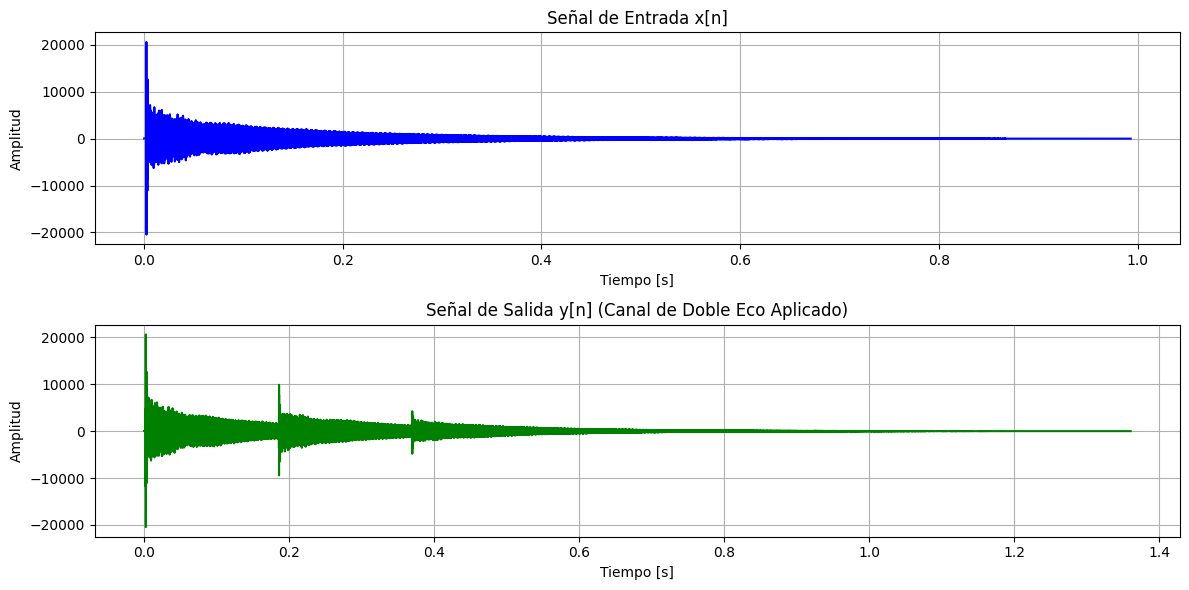

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# 1. Función del sistema: Canal de doble eco
def double_echo_system(x, a1, d1, a2, d2):
    """
    Aplica un canal de doble eco a la señal de entrada.

    Parámetros:
        x (numpy.ndarray): Señal de entrada.
        a1 (float): Amplitud del primer eco.
        d1 (int): Retardo del primer eco.
        a2 (float): Amplitud del segundo eco.
        d2 (int): Retardo del segundo eco.

    Retorna:
        y (numpy.ndarray): Señal de salida con el canal de doble eco aplicado.
    """
    N = len(x)  # Longitud de la señal de entrada
    y = np.zeros(N + d2)  # Crear salida con espacio suficiente para los retardos
    
    # Componente principal (sin retraso)
    y[:N] += x
    
    # Primer eco
    y[d1:N + d1] += a1 * x
    
    # Segundo eco
    y[d2:N + d2] += a2 * x
    
    return y

# 2. Cargar el archivo de audio
def load_audio(file_path):
    """
    Carga una señal de audio y la convierte a mono si es estéreo.

    Parámetros:
        file_path (str): Ruta del archivo de audio.

    Retorna:
        fs (int): Frecuencia de muestreo.
        x (numpy.ndarray): Señal de audio en mono.
    """
    fs, x = wavfile.read(file_path)  # Cargar archivo de audio
    
    # Si la señal es estéreo, convertir a mono
    if len(x.shape) > 1:
        print("La señal es estéreo. Convirtiendo a mono...")
        x = np.mean(x, axis=1)  # Promedio de canales
    
    x = x.astype(float)  # Convertir a tipo float
    return fs, x

# 3. Graficar señales
def plot_input_output(x, y, fs):
    """
    Grafica la señal de entrada y salida.

    Parámetros:
        x (numpy.ndarray): Señal de entrada.
        y (numpy.ndarray): Señal de salida.
        fs (int): Frecuencia de muestreo.
    """
    t_x = np.arange(len(x)) / fs  # Eje temporal de la señal de entrada
    t_y = np.arange(len(y)) / fs  # Eje temporal de la señal de salida

    plt.figure(figsize=(12, 6))

    # Señal de entrada
    plt.subplot(2, 1, 1)
    plt.plot(t_x, x, color='b')
    plt.title("Señal de Entrada x[n]")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid()

    # Señal de salida
    plt.subplot(2, 1, 2)
    plt.plot(t_y, y, color='g')
    plt.title("Señal de Salida y[n] (Canal de Doble Eco Aplicado)")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid()

    plt.tight_layout()
    plt.show()

# -----------------------------------------------
# Parámetros
audio_input = "data/audio.wav"  # Ruta del archivo de audio
a1, d1 = -0.45, 8820            # Amplitud y retardo del primer eco
a2, d2 = 0.2025, 17640          # Amplitud y retardo del segundo eco

# 1. Cargar la señal de entrada
fs, x = load_audio(audio_input)
print(f"Frecuencia de muestreo: {fs} Hz")
print(f"Longitud de la señal de entrada: {len(x)} muestras")

# 2. Aplicar el sistema de doble eco
y = double_echo_system(x, a1, d1, a2, d2)
print(f"Longitud de la señal de salida: {len(y)} muestras")

# 3. Graficar las señales
plot_input_output(x, y, fs)


In [91]:
import sounddevice as sd

def play_audio(signal, fs, description):
    """
    Reproduce una señal de audio.

    Parámetros:
        signal (numpy.ndarray): Señal de audio.
        fs (int): Frecuencia de muestreo.
        description (str): Descripción de la señal para la consola.
    """
    print(f"Reproduciendo: {description}...")
    sd.play(signal, samplerate=fs)
    sd.wait()  # Esperar hasta que termine la reproducción
    print(f"Reproducción de {description} completada.\n")

# 1. Reproducir la señal de entrada
play_audio(x, fs, "Señal de Entrada x[n]")

# 2. Reproducir la señal de salida
play_audio(y, fs, "Señal de Salida y[n] (Canal de Doble Eco Aplicado)")


Reproduciendo: Señal de Entrada x[n]...
Reproducción de Señal de Entrada x[n] completada.

Reproduciendo: Señal de Salida y[n] (Canal de Doble Eco Aplicado)...
Reproducción de Señal de Salida y[n] (Canal de Doble Eco Aplicado) completada.



Se observa claramente la senal de entrada y la senal de salida con los dos ecos atenuados.

Para compensar los ecos y que la senal filtrada sea lo mas cercana posible a la senal original, se implementara un filtro FIR que corrija la respuesta impulsional $ h[n] $ del canal de ecos.

La idea de implementar un **sistema corrector FIR** en **cascada** con el filtro de doble canal, es aproximar la **respuesta impulsional total** del sistema resultante a una **unica delta de Kronecker**

Si la respuesta impulsional total se aproxima a una delta, significa que el sistema (canal + filtro) no introduce distorsion ni retardos en la senal de entrada.

El filtro corrige el canal al cancelar los ecos con retardos y atenuaciones opuestos al filtro original. 

La señal es estéreo. Convirtiendo a mono...
Frecuencia de muestreo: 48000 Hz
Longitud de la señal de entrada: 47668 muestras


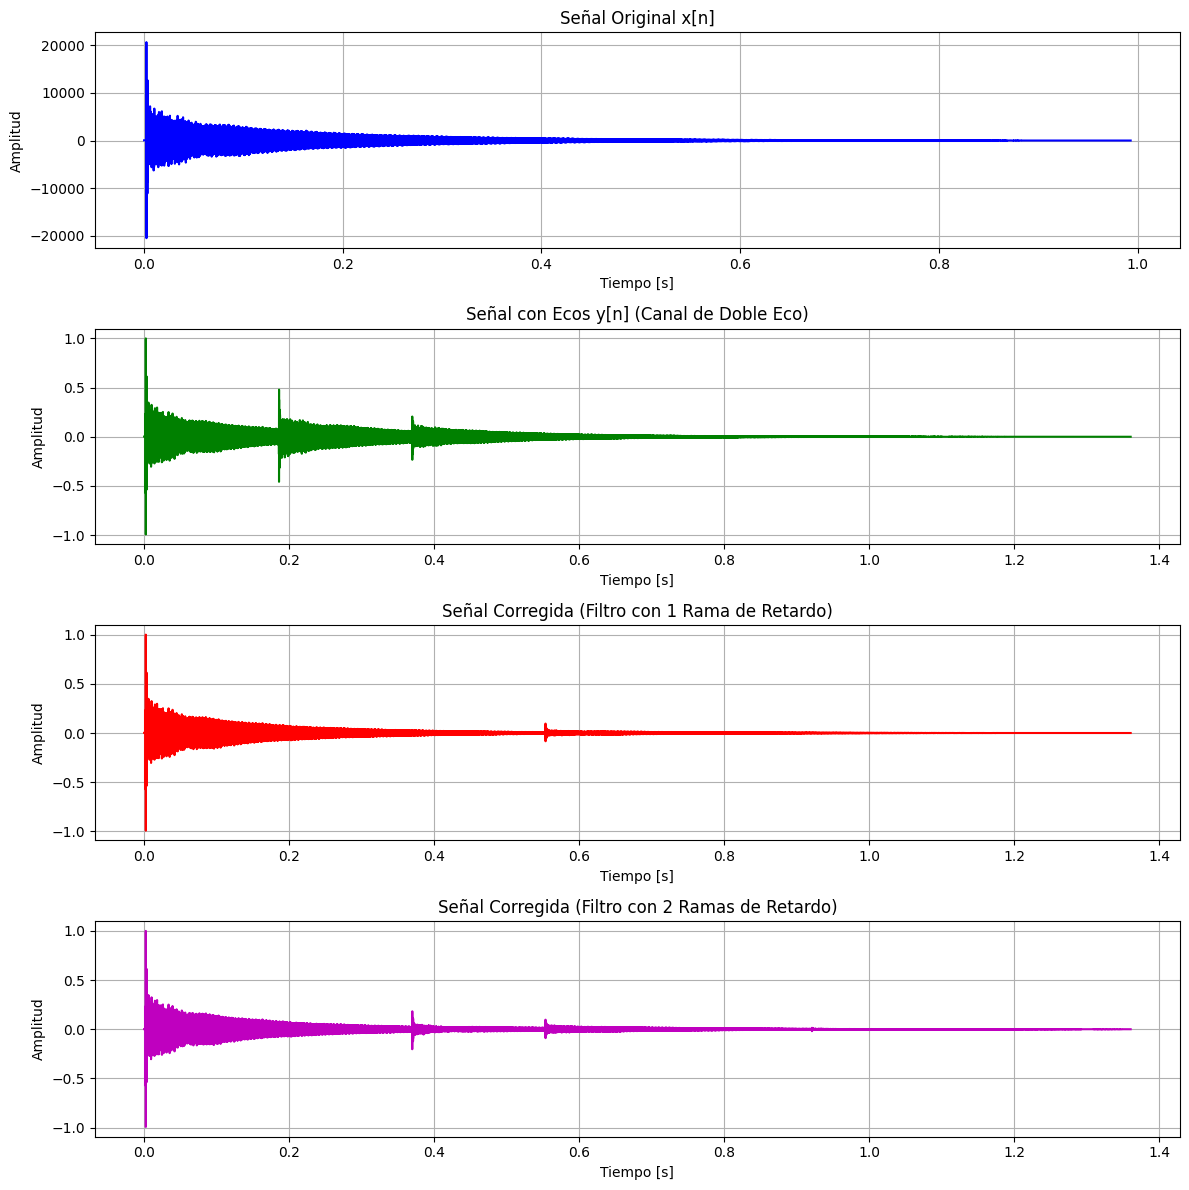

In [97]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# 1. Función del sistema: Canal de doble eco
def double_echo_system(x, a1, d1, a2, d2):
    """
    Aplica un canal de doble eco a la señal de entrada.

    Parámetros:
        x (numpy.ndarray): Señal de entrada.
        a1 (float): Amplitud del primer eco.
        d1 (int): Retardo del primer eco.
        a2 (float): Amplitud del segundo eco.
        d2 (int): Retardo del segundo eco.

    Retorna:
        y (numpy.ndarray): Señal de salida con el canal de doble eco aplicado.
    """
    N = len(x)  # Longitud de la señal de entrada
    y = np.zeros(N + d2)  # Crear salida con espacio suficiente para los retardos
    
    # Componente principal (sin retraso)
    y[:N] += x
    
    # Primer eco
    y[d1:N + d1] += a1 * x
    
    # Segundo eco
    y[d2:N + d2] += a2 * x
    
    return y / np.max(np.abs(y))  # Normalizar para evitar desbordamiento

# 2. Corregir la señal con un filtro de 1 rama de retardo
def correct_signal_1r(x, a1, d1):
    """
    Aplica una corrección de 1 rama de retardo a la señal de entrada.

    Parámetros:
        x (numpy.ndarray): Señal de entrada.
        a1 (float): Amplitud de la primera corrección.
        d1 (int): Retardo de la primera corrección.

    Retorna:
        y (numpy.ndarray): Señal corregida.
    """
    y = x.copy()
    y[d1:] -= a1 * y[:-d1]  # Corregir el eco
    return y

# 3. Corregir la señal con un filtro de 2 ramas de retardo
def correct_signal_2r(x, a1, d1, a2, d2):
    """
    Aplica una corrección de 2 ramas de retardo a la señal de entrada.

    Parámetros:
        x (numpy.ndarray): Señal de entrada.
        a1 (float): Amplitud de la primera corrección.
        d1 (int): Retardo de la primera corrección.
        a2 (float): Amplitud de la segunda corrección.
        d2 (int): Retardo de la segunda corrección.

    Retorna:
        y (numpy.ndarray): Señal corregida.
    """
    y = x.copy()
    y[d1:] -= a1 * y[:-d1]  # Corregir primer eco
    y[d2:] -= a2 * y[:-d2]  # Corregir segundo eco
    return y

# 4. Cargar el archivo de audio
def load_audio(file_path):
    """
    Carga una señal de audio y la convierte a mono si es estéreo.

    Parámetros:
        file_path (str): Ruta del archivo de audio.

    Retorna:
        fs (int): Frecuencia de muestreo.
        x (numpy.ndarray): Señal de audio en mono.
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"El archivo {file_path} no existe.")
    
    fs, x = wavfile.read(file_path)  # Cargar archivo de audio
    
    # Si la señal es estéreo, convertir a mono
    if len(x.shape) > 1:
        print("La señal es estéreo. Convirtiendo a mono...")
        x = np.mean(x, axis=1)  # Promedio de canales
    
    x = x.astype(float)  # Convertir a tipo float
    return fs, x

# 5. Graficar señales
def plot_signals(x, y_echo, y_corr1, y_corr2, fs):
    """
    Grafica las señales de entrada, con ecos y las corregidas.

    Parámetros:
        x (numpy.ndarray): Señal de entrada.
        y_echo (numpy.ndarray): Señal con ecos.
        y_corr1 (numpy.ndarray): Señal corregida (1 rama de retardo).
        y_corr2 (numpy.ndarray): Señal corregida (2 ramas de retardo).
        fs (int): Frecuencia de muestreo.
    """
    t_x = np.arange(len(x)) / fs  # Eje temporal de la señal de entrada
    t_y = np.arange(len(y_echo)) / fs  # Eje temporal de las señales de salida

    plt.figure(figsize=(12, 12))

    # Señal de entrada original
    plt.subplot(4, 1, 1)
    plt.plot(t_x, x, color='b')
    plt.title("Señal Original x[n]")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid()

    # Señal con ecos
    plt.subplot(4, 1, 2)
    plt.plot(t_y, y_echo, color='g')
    plt.title("Señal con Ecos y[n] (Canal de Doble Eco)")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid()

    # Señal corregida con 1 rama de retardo
    plt.subplot(4, 1, 3)
    plt.plot(t_y, y_corr1, color='r')
    plt.title("Señal Corregida (Filtro con 1 Rama de Retardo)")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid()

    # Señal corregida con 2 ramas de retardo
    plt.subplot(4, 1, 4)
    plt.plot(t_y, y_corr2, color='m')
    plt.title("Señal Corregida (Filtro con 2 Ramas de Retardo)")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid()

    plt.tight_layout()
    plt.show()

# -----------------------------------------------
# Parámetros
audio_input = "data/audio.wav"  # Ruta del archivo de audio
a1, d1 = -0.45, 8820            # Amplitud y retardo del primer eco
a2, d2 = 0.2025, 17640          # Amplitud y retardo del segundo eco

# 1. Cargar la señal de entrada
fs, x = load_audio(audio_input)
print(f"Frecuencia de muestreo: {fs} Hz")
print(f"Longitud de la señal de entrada: {len(x)} muestras")

# 2. Aplicar el sistema de doble eco
y_echo = double_echo_system(x, a1, d1, a2, d2)

# 3. Corregir la señal
y_corr1 = correct_signal_1r(y_echo, a1, d1)
y_corr2 = correct_signal_2r(y_echo, a1, d1, a2, d2)

# 4. Graficar todas las señales
plot_signals(x, y_echo, y_corr1, y_corr2, fs)
